In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dask import delayed
import bottleneck as bn
import seaborn as sns
import glob
from time import time
sns.set(style='ticks',font_scale=1.3,context='talk',color_codes=True)

In [7]:
import gsw
from scipy.io import netcdf_file

In [61]:
def read_zgrid(path):
    '''Read zgrid from model grid and store in "model" dictionary'''
    zgrid = pd.read_csv(path+'zgrid.out',skipinitialspace=True,sep=' ',header=None)
    zgrid=zgrid[1].values
    return ( zgrid[ np.int( np.where( zgrid=='face' )[0])+2: -1] ).astype('float')

In [65]:
# read grid
path = './output_2013asiri_08/'
zgrid1 = pd.read_csv(path+'zgrid.out', skipinitialspace=True, sep=' ', header=None)[1][1:51].astype(float)
ds = xr.open_dataset(path+'full_15400.cdf')
dsface = xr.open_dataset(path+'face_15400.cdf')

In [63]:
zgrid = read_zgrid(path)

In [70]:
pwd

'/Volumes/garuda/sebastian/psom_output'

In [73]:
zgrid[45]

-4.95681212788566

In [64]:
len(zgrid)

49

In [27]:
file = path+'face_15400.cdf'

In [28]:
uf=[]
vf=[]
wf=[]
with netcdf_file(file,'r',) as f: # scipy
    uf.append( f.variables['uf'][:].astype('float')*1e3*1e5 )
    vf.append( f.variables['vf'][:].astype('float')*1e3*1e5 )
    wf.append( f.variables['wf'][:].astype('float')*1e3*1e5 )   
    
uf = np.array(uf).squeeze()
vf = np.array(vf).squeeze()
wf = np.array(wf).squeeze()

In [29]:
ff = gsw.f(18)
ux = np.diff(uf,axis=2)/1e6
vy = np.diff(vf,axis=1)/1e6
div = (ux+vy)

In [31]:
div.shape

(48, 320, 192)

In [67]:
dz = np.append( np.diff( zgrid ),1)

In [69]:
dz.shape

(49,)

In [68]:
div.shape

(48, 320, 192)

In [37]:
new = np.zeros((50,322,194))

In [38]:
new[1:-1,1:-1,0] = div[:,:,0]
new[1:-1,1:-1,-1] = div[:,:,-1]
new[0,1:-1,1:-1] = div[0,:,:]
new[-1,1:-1,1:-1] = div[-1,:,:]
new[1:-1,0,1:-1] = div[:,0,:]
new[1:-1,-1,1:-1] = div[:,-1,:]
new[1:-1,1:-1,1:-1] = div

In [42]:
new[:,1,1]

array([ 2.92957474e-04,  2.92957474e-04, -4.24698929e-05, -8.45061995e-05,
       -3.11288816e-05, -1.60818371e-04,  4.19294920e-06,  5.46628462e-06,
        1.88002379e-05,  3.53108467e-05,  5.26827371e-05,  2.99171419e-05,
       -2.78358167e-05, -3.80576687e-05, -1.82085999e-05, -1.93861779e-05,
        1.95205361e-06,  1.20889799e-05, -6.57173327e-06, -2.59043681e-05,
       -4.54132276e-05, -3.44277494e-05,  3.22265117e-06,  2.79547677e-05,
        3.00228782e-05,  2.17029425e-05,  2.16503106e-05,  1.41274890e-05,
       -2.05562739e-06, -3.34835268e-05, -1.47270692e-05,  2.13951033e-07,
        7.07861014e-06,  2.15809439e-05,  1.83321220e-05,  2.87646526e-07,
       -1.23902878e-05, -1.47697915e-05, -9.88907665e-06, -6.89272879e-06,
       -5.51953773e-06, -3.62028170e-06, -1.08090613e-06,  1.14482650e-06,
        1.62414457e-06,  7.11804989e-07,  7.01854384e-07,  6.99517072e-07,
        5.97237227e-07,  5.97237227e-07])

In [49]:
dz.shape

(50,)

In [57]:
new[:,:,1].shape

(50, 322)

In [58]:
for i in range(new[0,0,:].size):
    new[:,:,i] = new[:,:,i] / dz[:,None]

In [56]:
a.shape

(50, 322)

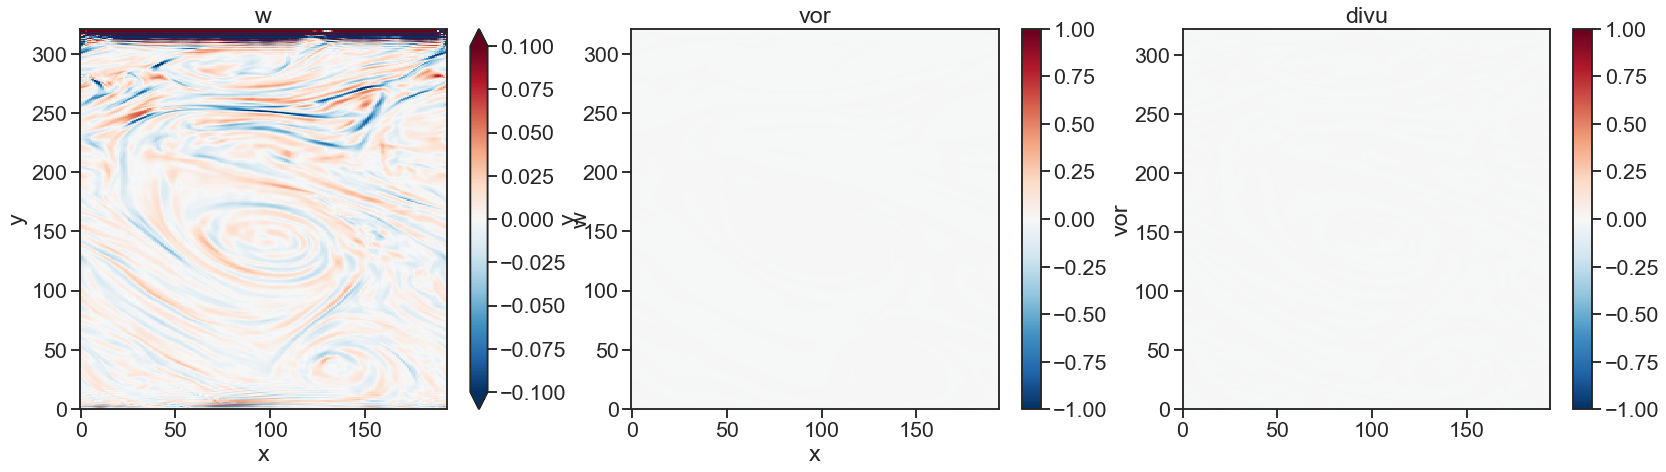

In [24]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(28,7))
ds.w[47,:,:].plot(vmin=-0.1,vmax=0.1,cmap='RdBu_r',ax=ax1)
ax1.set_title('w')
ds.vor[47,:,:].plot(vmin=-1,vmax=1,cmap='RdBu_r',ax=ax2)
ax2.set_title('vor')
h = ax3.pcolormesh(new[47,:,:],vmin=-1,vmax=1,cmap='RdBu_r');
plt.colorbar(h,ax=ax3)
ax3.set_title('divu');